<a href="https://colab.research.google.com/github/CWanjohi/SimpleImageClassifier/blob/master/DIP_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
Primary Objective: Create CNN model. Use the model to classify handwritten digits.
Secondary: CNN to generate artistic work.

# Workflow
1. How to load the MNIST dataset and examine structure.
  *   Use any library to load the dataset- Tensorflow,PyTorch.
  *   Examine shape, size and quantity(Image_processing).
  *   View some random sample using OpenCV,matplotlib etc. of the handwritten digits and complexity of the images.

2. Use numpy etc. to prepare the dataset for training.
  *  Ensure the data format and shape is appropriate for the model's input (one-hot encoding).
  *   Ensure data normalization.
3. Create a CNN model.
  *   Input image-28x28x1 
  *   2 convolutional layers (kernel size 3x3). 1st will have 64 filters, 2nd will have 32. Use ReLU (Rectified Linear Unit) as an activation function.
  *   Max pooling 2x2
  *   Dropout rate-0.25
  *   Use dense layer with 128 outputs
  *   Add dropout layer using rate setting-0.5
  *   Add the final dropout layer that indicates the class probabilities

4. Train model using MNIST dataset.
  *   train for 10 epochs with batch size- 32

5. Plot graphs to show how training and validation loss and accuracy changed with respect to the epochs completed.

6. Save the model for future use in the 2nd part.
7. Test model using random samples training set.














# Deliverable
Jupyter notebook to document the workflow. View samples from the dataset, convert to appropriate format for the deep learning library.

# Code




In [51]:
#load dataset
from tensorflow.keras.datasets import mnist

In [52]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#display data samples from training and test data.

print("Initial dimensions and shape of x_train: ",str(x_train.shape))
print("Total number of samples in training data: ",str(len(x_train)))
print("Number of labels in training data: ",str(len(y_train)))

print("Initial dimensions and shape of test data: ",str(x_test.shape),"\n")
print("Total number of samples in test data: ",str(len(x_test)))
print("Number of labels in test data: ",str(len(x_test)))

print("Dimension of training data: ",str(x_train[0].shape))
print("Labels of training data ",str(y_train.shape))

print("Dimension of test data: ",str(x_test[0].shape))
print("labels of test data: ",str(y_test.shape))

Initial dimensions and shape of x_train:  (60000, 28, 28)
Total number of samples in training data:  60000
Number of labels in training data:  60000
Initial dimensions and shape of test data:  (10000, 28, 28) 

Total number of samples in test data:  10000
Number of labels in test data:  10000
Dimension of training data:  (28, 28)
Labels of training data  (60000,)
Dimension of test data:  (28, 28)
labels of test data:  (10000,)


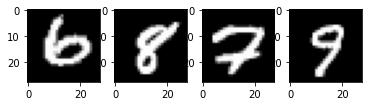

In [55]:
import matplotlib.pyplot as plt
import numpy as np

#Objective: View random samples using OpenCV,matplotlib etc. of the handwritten digits and complexity of the images.
#plot 6 images using the subplot function.
#set the colormap to grey. Since the image dataset is grayscale/black and white.
plt.subplot(141)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number],cmap=plt.get_cmap('gray'))

plt.subplot(142)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(143)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

plt.subplot(144)
random_number = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_number], cmap=plt.get_cmap('gray'))

Prepare the dataset using keras
Keras requires our data in a 4-D shape (60000,28,28,1). We loaded the data as a 3-D shape (60000,28,28).
We need our labels to be one-hot encoded into the data

In [35]:
#store the data's rows and columns
image_rows = x_train[0].shape[0]
image_columns = x_train[0].shape[1]

#get the data into the right shape, 4-D tensor.
x_train = x_train.reshape(x_train.shape[0],image_rows,image_columns,1)
x_test = x_test.reshape(x_test.shape[0],image_rows,image_columns,1)

#store the shape of a single image for future use 
input_shape = (image_rows,image_columns,1)

#change image type to float32 from unsignedint
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range from 0-255 to 0-1
x_train /= 255.0 
x_test /= 255.0

print("X_train shape: ",x_train.shape)
print(x_train.shape[0], "x_train samples")
print(x_test.shape[0], "x_test samples")

X_train shape:  (60000, 28, 28, 1)
60000 x_train samples
10000 x_test samples


In [36]:
#Perform One-Hot Encoding of the data labels
from tensorflow.keras.utils import to_categorical

#one-hot encode for the outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count the number of columns in the OHE matrix
print("Number of classes: " + str(y_test.shape[1]))
num_classes = y_test.shape[1] #classed the images as images for 1,2,3,4,...,10

Number of classes: 10


Creating the CNN model

In [37]:
#input is an image 28x28 as grayscale

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.backend import backend as K
from tensorflow.keras.optimizers import SGD

#What's the criteria used in determining number of filters in the convolutional layers?
#-> https://www.quora.com/What-is-a-filter-in-the-context-of-Convolutional-Neural-Networks

model = Sequential()

#the first layer-filter size=32 which reduces our layer size to 26*26*32
# use ReLU as activation function. Input shape is 28x28x1

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#second layer. Filter size=64. Reduces the layer size to 24*24*64
model.add(Conv2D(64, kernel_size=(3,3),activation ='relu'))

#specify a max_pool with a size of 2*2. Reduces the layer size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#dropout to reduce Overfitting
model.add(Dropout(0.25))

#flatten the tensor before being passed to the output layer
#Flattening a tensor reshapes the tensor to have the shape that is equal to the number of elements contained in the tensor.
#It goes from 12*12*64 to 9612*1

model.add(Flatten())

#use another dropout layer
model.add(Dropout(0.5))

#create a fully-connected/Dense layer
model.add(Dense(num_classes, activation='softmax'))

#compile the model which create an object that store the model.
#set the optimizer to use stochastic gradient descent; learning rate=0.01
#set the loss function to be categorical_crossentropy as it's suitable for multiclass problems.
#Finally, the metrics(to judge the model's performance) we use accuracy.
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

#the summary function can be used to show the models layers and parameters
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

Model training

In [38]:
batch_size = 32
epochs = 10

#store the results for plotting later on.
#in the fit function, we specify the dataset as x_train and y_train.
#batch size can be from 16-128(RAM intensive)
#the number of epochs(learning iterations) is usually 10-100
#the validation dataset is (x_test,y_test)
# verbose=1 to set the training to outputperformance metrics every epoch.

history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs,
                    verbose=1, validation_data=(x_test,y_test))

#obtain the acurraacy using the evaluative function
score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

Epoch 1/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.5654 - accuracy: 0.8266 - val_loss: 0.2621 - val_accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.2473 - accuracy: 0.9268 - val_loss: 0.1365 - val_accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1573 - accuracy: 0.9532 - val_loss: 0.0942 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.1242 - accuracy: 0.9634 - val_loss: 0.0760 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 153s 81ms/step - loss: 0.1085 - accuracy: 0.9674 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.0978 - accuracy: 0.9706 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0880 - accuracy: 0.9734 - val_loss: 0

Plot the training progress

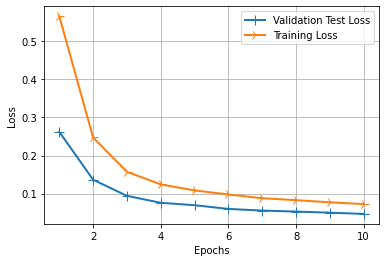

In [40]:
#plot the loss chart.
#Use history object to get our saved performance. create a history dict that will contain history.history.
history_dict = history.history
#Extract the loss and validation.
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

#get number of epochs and create an array using range() function
epoch = range(1,len(loss_values)+1)

#plot line charts for both validation
line1 = plt.plot(epoch,validation_loss_values, label="Validation Test Loss")
line2 = plt.plot(epoch, loss_values, label = "Training Loss")

plt.setp(line1,linewidth=2.0,marker = '+', markersize= 10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize= 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

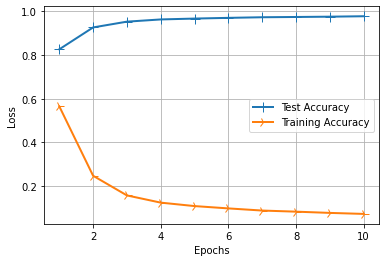

In [42]:
#plot accuracy curve

accuracy_values = history_dict['accuracy']
accuracy_loss_values = history_dict['val_accuracy']


#get number of epochs and create an array using range() function
epoch = range(1,len(accuracy_values)+1)

line1 = plt.plot(epoch, accuracy_values, label = "Test Accuracy")
line2 = plt.plot(epoch, loss_values, label = "Training Accuracy")

plt.setp(line1,linewidth=2.0,marker = '+', markersize= 10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize= 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [43]:
#save the model
model.save('MNIST_Simple_CNN_10-Epoch.h5')

0	0	6	6	9	

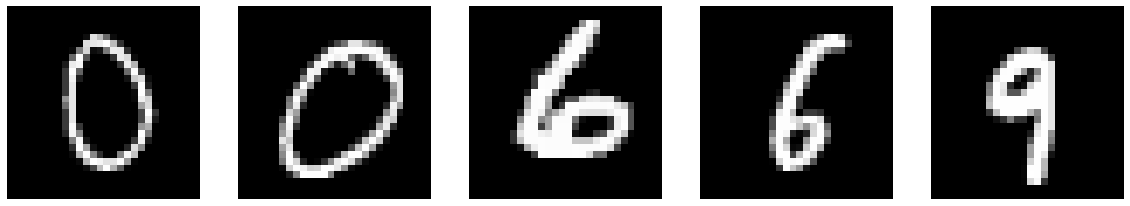

In [49]:
#test using random data
from tensorflow.keras.models import load_model
classifier = load_model('MNIST_Simple_CNN_10-Epoch.h5')

figure = plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_index = np.random.randint(0, len(x_test))
  plt.imshow(x_test[random_index,:,:,0],cmap='gray')
  plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_index].reshape(1,28,28,1)),axis=1),axis=0),end = '\t')

Visualization of the CNN 